task 4 - analysis traffic accident data to identify patterns related to road conditions, weather, and time of the day. Visualize accident hotspots and contributing factors -  https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

In [1]:
pip install geopandas 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [3]:
import os

# List files in the current directory to confirm the file is there
print(os.listdir())


['.ipynb_checkpoints', 'task_01.ipynb', 'task_02.ipynb', 'task_03.ipynb', 'task_04.ipynb', 'US_Accidents_March23.csv']


Dataset chunk loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  St

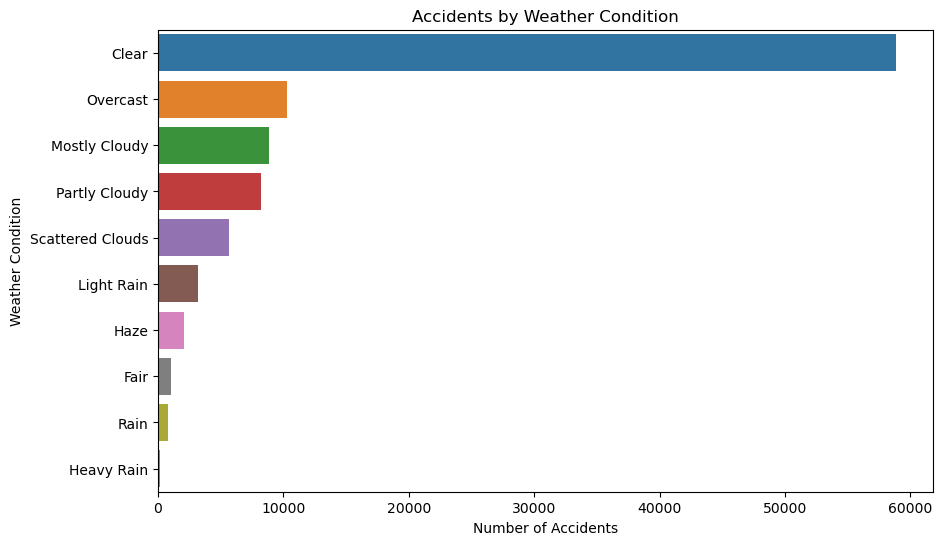

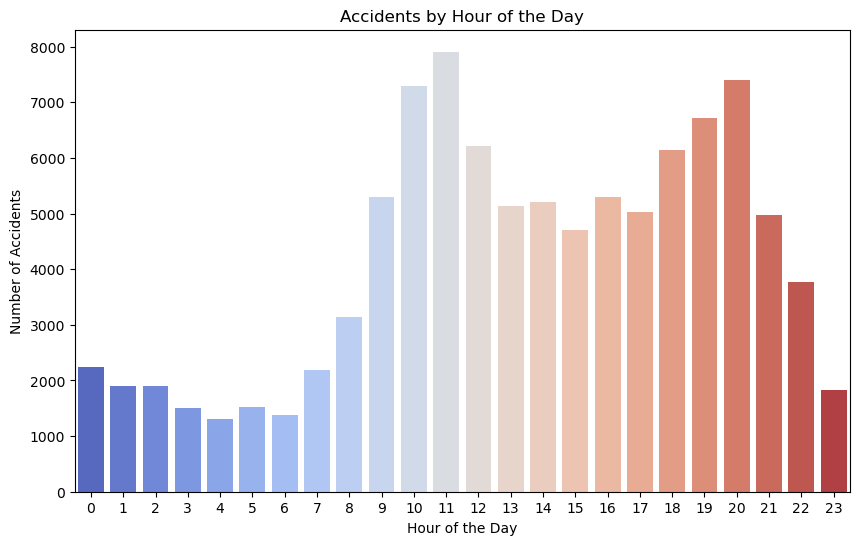

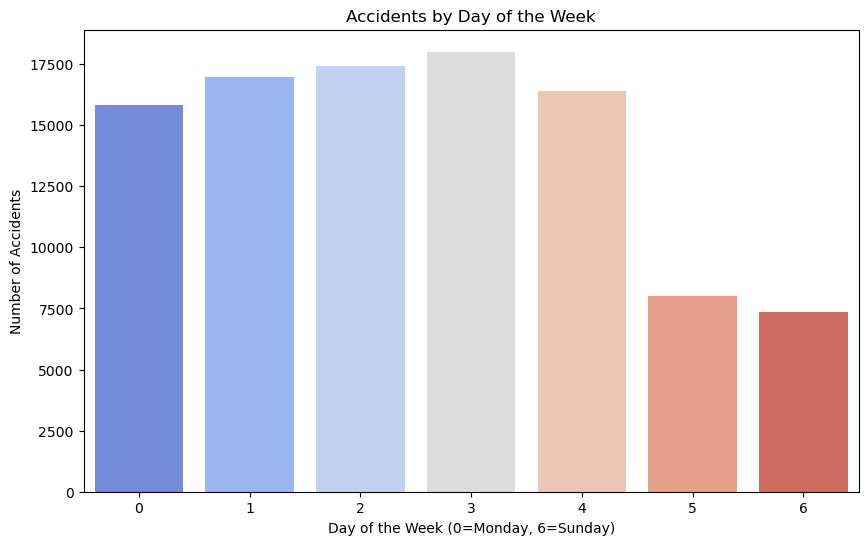

<Figure size 1200x800 with 0 Axes>

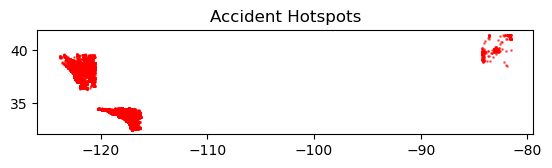

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import os

# Load a manageable chunk of the dataset
chunk_size = 100000  # Adjust the chunk size as needed
data_chunks = []
try:
    for chunk in pd.read_csv("US_Accidents_March23.csv", encoding='utf-8', on_bad_lines='skip', chunksize=chunk_size):
        data_chunks.append(chunk)
        break  # Load only the first chunk
    df = data_chunks[0]
    print("Dataset chunk loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Show basic info and first few rows
if 'df' in locals():
    print(df.info())
    print(df.head())

# Step 1: Preprocessing
if 'df' in locals():
    # Convert 'Start_Time' to datetime format
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    
    # Extract additional features: Hour of the day, Weekday, etc.
    df['Hour'] = df['Start_Time'].dt.hour
    df['Weekday'] = df['Start_Time'].dt.weekday
    df['Year'] = df['Start_Time'].dt.year
    df['Month'] = df['Start_Time'].dt.month

    # Fill missing values with appropriate strategy (mode for categorical features)
    for col in ['Weather_Condition', 'Sunrise_Sunset']:
        if col in df.columns:
            df[col].fillna(df[col].mode()[0], inplace=True)
    
    for col in ['Temperature(F)', 'Humidity(%)']:
        if col in df.columns:
            df[col].fillna(df[col].mean(), inplace=True)
    
    # Convert categorical variables to numerical using LabelEncoder
    le = LabelEncoder()
    if 'Weather_Condition' in df.columns:
        df['Weather_Condition_Encoded'] = le.fit_transform(df['Weather_Condition'])
    
    # Step 2: Visualizations
    # 1. Accidents by Weather Condition
    if 'Weather_Condition' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, y='Weather_Condition', order=df['Weather_Condition'].value_counts().index[:10])
        plt.title('Accidents by Weather Condition')
        plt.xlabel('Number of Accidents')
        plt.ylabel('Weather Condition')
        plt.show()
    
    # 2. Time of Day Analysis: Hour of the day
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Hour', palette='coolwarm')
    plt.title('Accidents by Hour of the Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Accidents')
    plt.show()
    
    # 3. Weekday analysis
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Weekday', palette='coolwarm')
    plt.title('Accidents by Day of the Week')
    plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
    plt.ylabel('Number of Accidents')
    plt.show()
    
    # Step 3: Hotspot Visualization using Geospatial Data
    if 'Start_Lat' in df.columns and 'Start_Lng' in df.columns:
        gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Start_Lng'], df['Start_Lat']))
        plt.figure(figsize=(12, 8))
        gdf.plot(marker='o', color='red', markersize=1, alpha=0.5)
        plt.title('Accident Hotspots')
        plt.show()
    else:
        print("Latitude and/or Longitude columns are missing. Cannot create geospatial visualization.")
